In [ ]:
import pre
from sklearn import preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score


In [ ]:
layer=1       #Change to 0 or 1 , 0 for layer 1 , 1 for layer 2

In [ ]:
label=label=pre.create_label(layer)
corpus=pre.create_sentence_list(1)
from nltk.stem import SnowballStemmer
 
st = SnowballStemmer("english")
text = pre.norm_corpus
 
output = []
for sentence in text:
    output.append(" ".join([st.stem(i) for i in sentence.split()]))
fileid=pre.fileid
tv = TfidfVectorizer(min_df=0., max_df=1.,max_features=1500 ,use_idf=True,lowercase=True,ngram_range=(1,2),analyzer=u'word',smooth_idf=True)
tv_matrix = tv.fit_transform(text)
tv_matrix = tv_matrix.toarray()

print(len(tv_matrix))
print(label)
print(pre.norm_corpus)

16036
[['GEN'], ['GEN'], ['MAJ'], ['MIN'], ['GEN'], ['MIN'], ['GEN'], ['GEN'], ['GEN'], ['GEN'], ['GEN'], ['GEN'], ['GEN'], ['MAJ'], ['MIN'], ['MIN'], ['MAJ'], ['MAJ'], ['MIN'], ['MIN'], ['MIN'], ['GEN'], ['GEN'], ['GEN'], ['MIN'], ['MIN'], ['MIN'], ['GEN'], ['MIN'], ['MIN'], ['MIN'], ['MIN'], ['MAJ'], ['MIN'], ['MIN'], ['GEN'], ['GEN'], ['MAJ'], ['MIN'], ['MAJ'], ['GEN'], ['MIN'], ['MIN'], ['MIN'], ['MIN'], ['MIN'], ['MIN'], ['MAJ'], ['MIN'], ['MIN'], ['MIN'], ['MAJ'], ['MAJ'], ['GEN'], ['GEN'], ['MAJ'], ['GEN'], ['MIN'], ['GEN'], ['GEN'], ['MAJ'], ['MIN'], ['MAJ'], ['MAJ'], ['MAJ'], ['MAJ'], ['MAJ'], ['MAJ'], ['MIN'], ['MIN'], ['MIN'], ['MAJ'], ['MIN'], ['MAJ'], ['MAJ'], ['MIN'], ['MAJ'], ['GEN'], ['GEN'], ['GEN'], ['GEN'], ['GEN'], ['MAJ'], ['MAJ'], ['MIN'], ['GEN'], ['MAJ'], ['GEN'], ['MIN'], ['MIN'], ['MIN'], ['MIN'], ['MIN'], ['MIN'], ['MIN'], ['MIN'], ['MIN'], ['MIN'], ['GEN'], ['GEN'], ['GEN'], ['MIN'], ['MIN'], ['GEN'], ['GEN'], ['MAJ'], ['MAJ'], ['MIN'], ['MIN'], ['MIN'], ['M

In [ ]:
new_label=[]
new_tv=[]
new_fileid=[]
new_corpus=[]
length = len(tv_matrix)
for i in range(0, length):
  for j in range(0,len(label[i])):
    new_tv.append(tv_matrix[i])
    new_label.append(label[i][j])
    new_fileid.append(fileid[i])
    new_corpus.append(text[i])
vocab = tv.get_feature_names()
df_tfidf=pre.pd.DataFrame(pre.np.round(new_tv, 10), columns=vocab)
#df_tfidf.insert(0, "sentences", corpus)
df_tfidf["tag"]=new_label
df_tfidf

,ability,ablation,able,abstract,accept,acceptance,accepted,access,according,account,accuraci,accuracy,achieve,achieved,achieves,across,action,actions,activation,activation function,activations,active,active learning,actor,actorcritic,actual,actually,adaptation,adaptive,added,adding,addition,additional,additionally,address,addressed,addresses,advantage,advantages,adversarial,...,whereas,whether,whole,whose,widely,within,without,wonder,word,word embeddings,words,work,work well,works,world,worse,worth,would,would also,would better,would expect,would good,would great,would help,would helpful,would interesting,would like,would liked,would make,would much,would nice,would suggest,would useful,write,writing,written,written easy,wrong,zero,tag
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.375388,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.360994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,GEN
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,GEN
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,MAJ
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,MIN
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,GEN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,MIN
16038,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,MAJ
16039,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,MAJ
16040,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

Creating X

In [ ]:
import numpy as np
X_df=df_tfidf[df_tfidf.columns[0:-1]] #X dataframe
X=X_df.to_numpy()    # X in array
y=df_tfidf["tag"]
print(np.unique(df_tfidf["tag"]))
class_names=np.unique(df_tfidf["tag"])

['CNT' 'GEN' 'MAJ' 'MIN']


In [ ]:
from collections import Counter
print(Counter(y))

Counter({'MAJ': 5885, 'MIN': 5854, 'GEN': 4278, 'CNT': 25})


SPLIT

In [ ]:
from sklearn.model_selection import train_test_split
from collections import Counter
X_tr, X_test, y_tr, y_test = train_test_split(X, y, test_size=0.33, shuffle=True)
y_tr=y_tr.reset_index()['tag'].tolist()
print(X_tr.shape)
print(len(y_tr))

(10748, 1500)
10748


In [ ]:
X_train=X_tr
y_train=y_tr

In [ ]:
# print(X_train.shape)
# print(len(y_train))
# print(c)
# print(length)
# print(y_train)

LOGISTIC

In [ ]:

import sklearn.metrics as metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
logmodel = LogisticRegression(class_weight='balanced',solver='liblinear')
logmodel.fit(X_train,y_train)
y_pred = logmodel.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred,zero_division=1))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


              precision    recall  f1-score   support

         CNT       0.00      0.00      0.00         9
         GEN       0.54      0.58      0.56      1432
         MAJ       0.61      0.57      0.59      1949
         MIN       0.55      0.56      0.55      1904

    accuracy                           0.57      5294
   macro avg       0.43      0.43      0.43      5294
weighted avg       0.57      0.57      0.57      5294

Accuracy: 0.5678126180581791


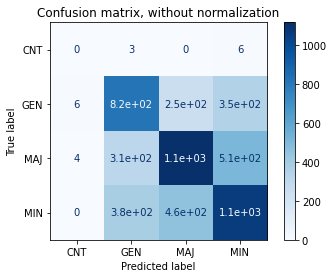

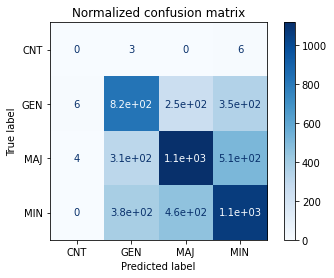

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
np.set_printoptions(precision=3)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(logmodel, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues)
    disp.ax_.set_title(title)

plt.show()

MULTINOMIAL

In [ ]:
import sklearn.metrics as metrics
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


              precision    recall  f1-score   support

         CNT       0.00      0.00      0.00         9
         GEN       0.62      0.51      0.56      1432
         MAJ       0.58      0.58      0.58      1949
         MIN       0.53      0.59      0.56      1904

    accuracy                           0.57      5294
   macro avg       0.43      0.42      0.43      5294
weighted avg       0.57      0.57      0.57      5294

Accuracy: 0.5680015111446921


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


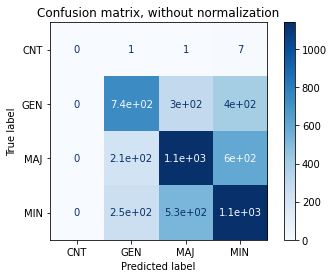

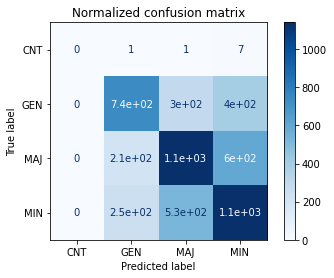

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
np.set_printoptions(precision=3)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues)
    disp.ax_.set_title(title)

plt.show()

RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create the model with 100 trees
clf = RandomForestClassifier(n_estimators=200, 
                               bootstrap = True,
                               max_features = 'sqrt',class_weight='balanced_subsample')

import sklearn.metrics as metrics
clf.fit(X_tr,y_tr)
y_pred = clf.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred,zero_division=1))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

         CNT       0.00      0.00      0.00         9
         GEN       0.55      0.49      0.52      1432
         MAJ       0.57      0.59      0.58      1949
         MIN       0.54      0.56      0.55      1904

    accuracy                           0.55      5294
   macro avg       0.41      0.41      0.41      5294
weighted avg       0.55      0.55      0.55      5294

Accuracy: 0.5527011711371363


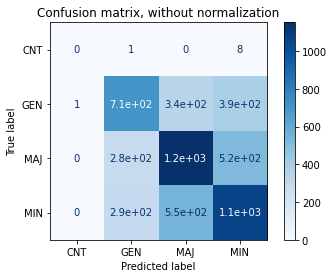

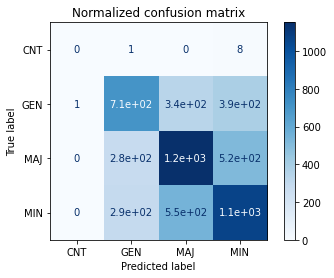

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
np.set_printoptions(precision=3)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues)
    disp.ax_.set_title(title)

plt.show()

SVM

In [ ]:
from sklearn import svm
from sklearn.model_selection import train_test_split
# Make a decision tree and train
clf = svm.SVC(class_weight='balanced',decision_function_shape='ovo')
import sklearn.metrics as metrics
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred,zero_division=1))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

         CNT       0.00      0.00      0.00         9
         GEN       0.53      0.60      0.57      1432
         MAJ       0.63      0.55      0.58      1949
         MIN       0.55      0.57      0.56      1904

    accuracy                           0.57      5294
   macro avg       0.43      0.43      0.43      5294
weighted avg       0.57      0.57      0.57      5294

Accuracy: 0.5702682281828485


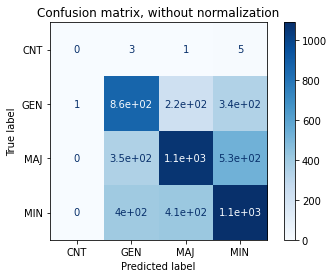

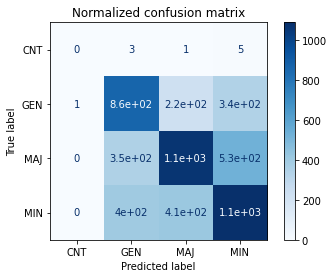

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
np.set_printoptions(precision=3)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues)
    disp.ax_.set_title(title)

plt.show()

SGD

In [ ]:

from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred,zero_division=1))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

         CNT       1.00      0.00      0.00         9
         GEN       0.52      0.61      0.56      1432
         MAJ       0.68      0.45      0.54      1949
         MIN       0.53      0.64      0.58      1904

    accuracy                           0.56      5294
   macro avg       0.68      0.42      0.42      5294
weighted avg       0.58      0.56      0.56      5294

Accuracy: 0.5598791084246316


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


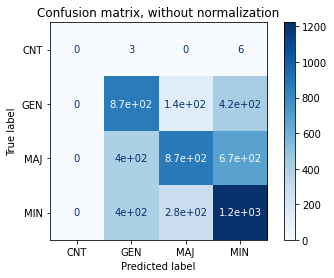

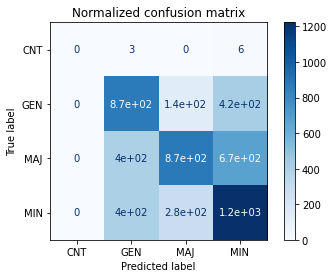

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
np.set_printoptions(precision=3)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues)
    disp.ax_.set_title(title)

plt.show()

DECISION TREE

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred,zero_division=1))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

         CNT       0.00      0.00      0.00         9
         GEN       0.44      0.42      0.43      1432
         MAJ       0.49      0.51      0.50      1949
         MIN       0.48      0.47      0.47      1904

    accuracy                           0.47      5294
   macro avg       0.35      0.35      0.35      5294
weighted avg       0.47      0.47      0.47      5294

Accuracy: 0.47223271628258406


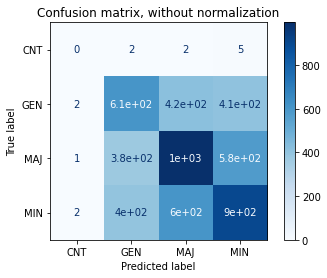

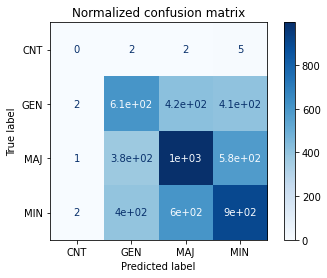

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
np.set_printoptions(precision=3)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues)
    disp.ax_.set_title(title)

plt.show()